In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

separator = ','
target = 'data_type'

df = pd.read_csv("processed/sampled/modbusDataset.csv", sep=separator, header=0, index_col=None)

In [3]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222174 entries, 0 to 222173
Data columns (total 27 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   flow                          222174 non-null  float64
 1   modbus_pdu                    222174 non-null  int64  
 2   modbus_type                   222174 non-null  float64
 3   pkt_len                       222174 non-null  int64  
 4   src_port                      222174 non-null  int64  
 5   dst_port                      222174 non-null  int64  
 6   tcp_chksum                    222174 non-null  int64  
 7   ip_len                        222174 non-null  int64  
 8   ip_chksum                     222174 non-null  int64  
 9   tcp_window                    222174 non-null  int64  
 10  modbus_len                    222174 non-null  int64  
 11  modbus_func_code              222174 non-null  int64  
 12  modbus_start_addr_NA_IND      222174 non-nul

In [4]:
round((df.isnull().sum()/df.shape[0])*100,2)

flow                            0.0
modbus_pdu                      0.0
modbus_type                     0.0
pkt_len                         0.0
src_port                        0.0
dst_port                        0.0
tcp_chksum                      0.0
ip_len                          0.0
ip_chksum                       0.0
tcp_window                      0.0
modbus_len                      0.0
modbus_func_code                0.0
modbus_start_addr_NA_IND        0.0
modbus_quantity_NA_IND          0.0
modbus_output_addr_NA_IND       0.0
modbus_output_value_NA_IND      0.0
modbus_byte_count_NA_IND        0.0
modbus_coil_status_0_NA_IND     0.0
modbus_coil_status_1_NA_IND     0.0
modbus_input_status_0_NA_IND    0.0
modbus_input_status_1_NA_IND    0.0
modbus_register_val_NA_IND      0.0
modbus_register_addr_NA_IND     0.0
modbus_register_value_NA_IND    0.0
modbus_except_code_NA_IND       0.0
attack_type                     0.0
data_type                       0.0
dtype: float64

In [5]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,flow,modbus_pdu,modbus_type,pkt_len,src_port,dst_port,tcp_chksum,ip_len,ip_chksum,tcp_window,...,modbus_coil_status_0_NA_IND,modbus_coil_status_1_NA_IND,modbus_input_status_0_NA_IND,modbus_input_status_1_NA_IND,modbus_register_val_NA_IND,modbus_register_addr_NA_IND,modbus_register_value_NA_IND,modbus_except_code_NA_IND,attack_type,data_type
count,222174.00000,222174.00000,222174.00000,222174.00000,222174.00000,222174.00000,222174.00000,222174.00000,222174.00000,222174.00000,...,222174.00000,222174.00000,222174.00000,222174.00000,222174.00000,222174.00000,222174.00000,222174.00000,222174.00000,222174.00000
mean,0.46416,2.11761,1.39323,79.82712,24434.98418,19355.89764,29594.98286,65.82712,22875.03445,505.03556,...,0.77518,0.77518,0.93625,0.93625,0.87566,0.99856,0.99856,0.97933,2.94444,0.50000
std,0.49871,1.31921,0.52910,13.99664,21853.24678,22220.08046,14.06187,13.99664,18978.61577,3.46347,...,0.41746,0.41746,0.24431,0.24431,0.32997,0.03786,0.03786,0.14229,2.75827,0.50000
min,0.00000,1.00000,0.00000,75.00000,502.00000,502.00000,29589.00000,61.00000,0.00000,502.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,1.00000,1.00000,76.00000,502.00000,502.00000,29591.00000,62.00000,7305.00000,502.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000
50%,0.00000,2.00000,1.00000,78.00000,34236.00000,502.00000,29592.00000,64.00000,16035.00000,502.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.50000
75%,1.00000,3.00000,2.00000,78.00000,41714.00000,40110.00000,29594.00000,64.00000,37372.00000,509.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,5.00000,1.00000
max,1.00000,6.00000,2.00000,426.00000,60998.00000,60998.00000,29944.00000,412.00000,65534.00000,509.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,9.00000,1.00000


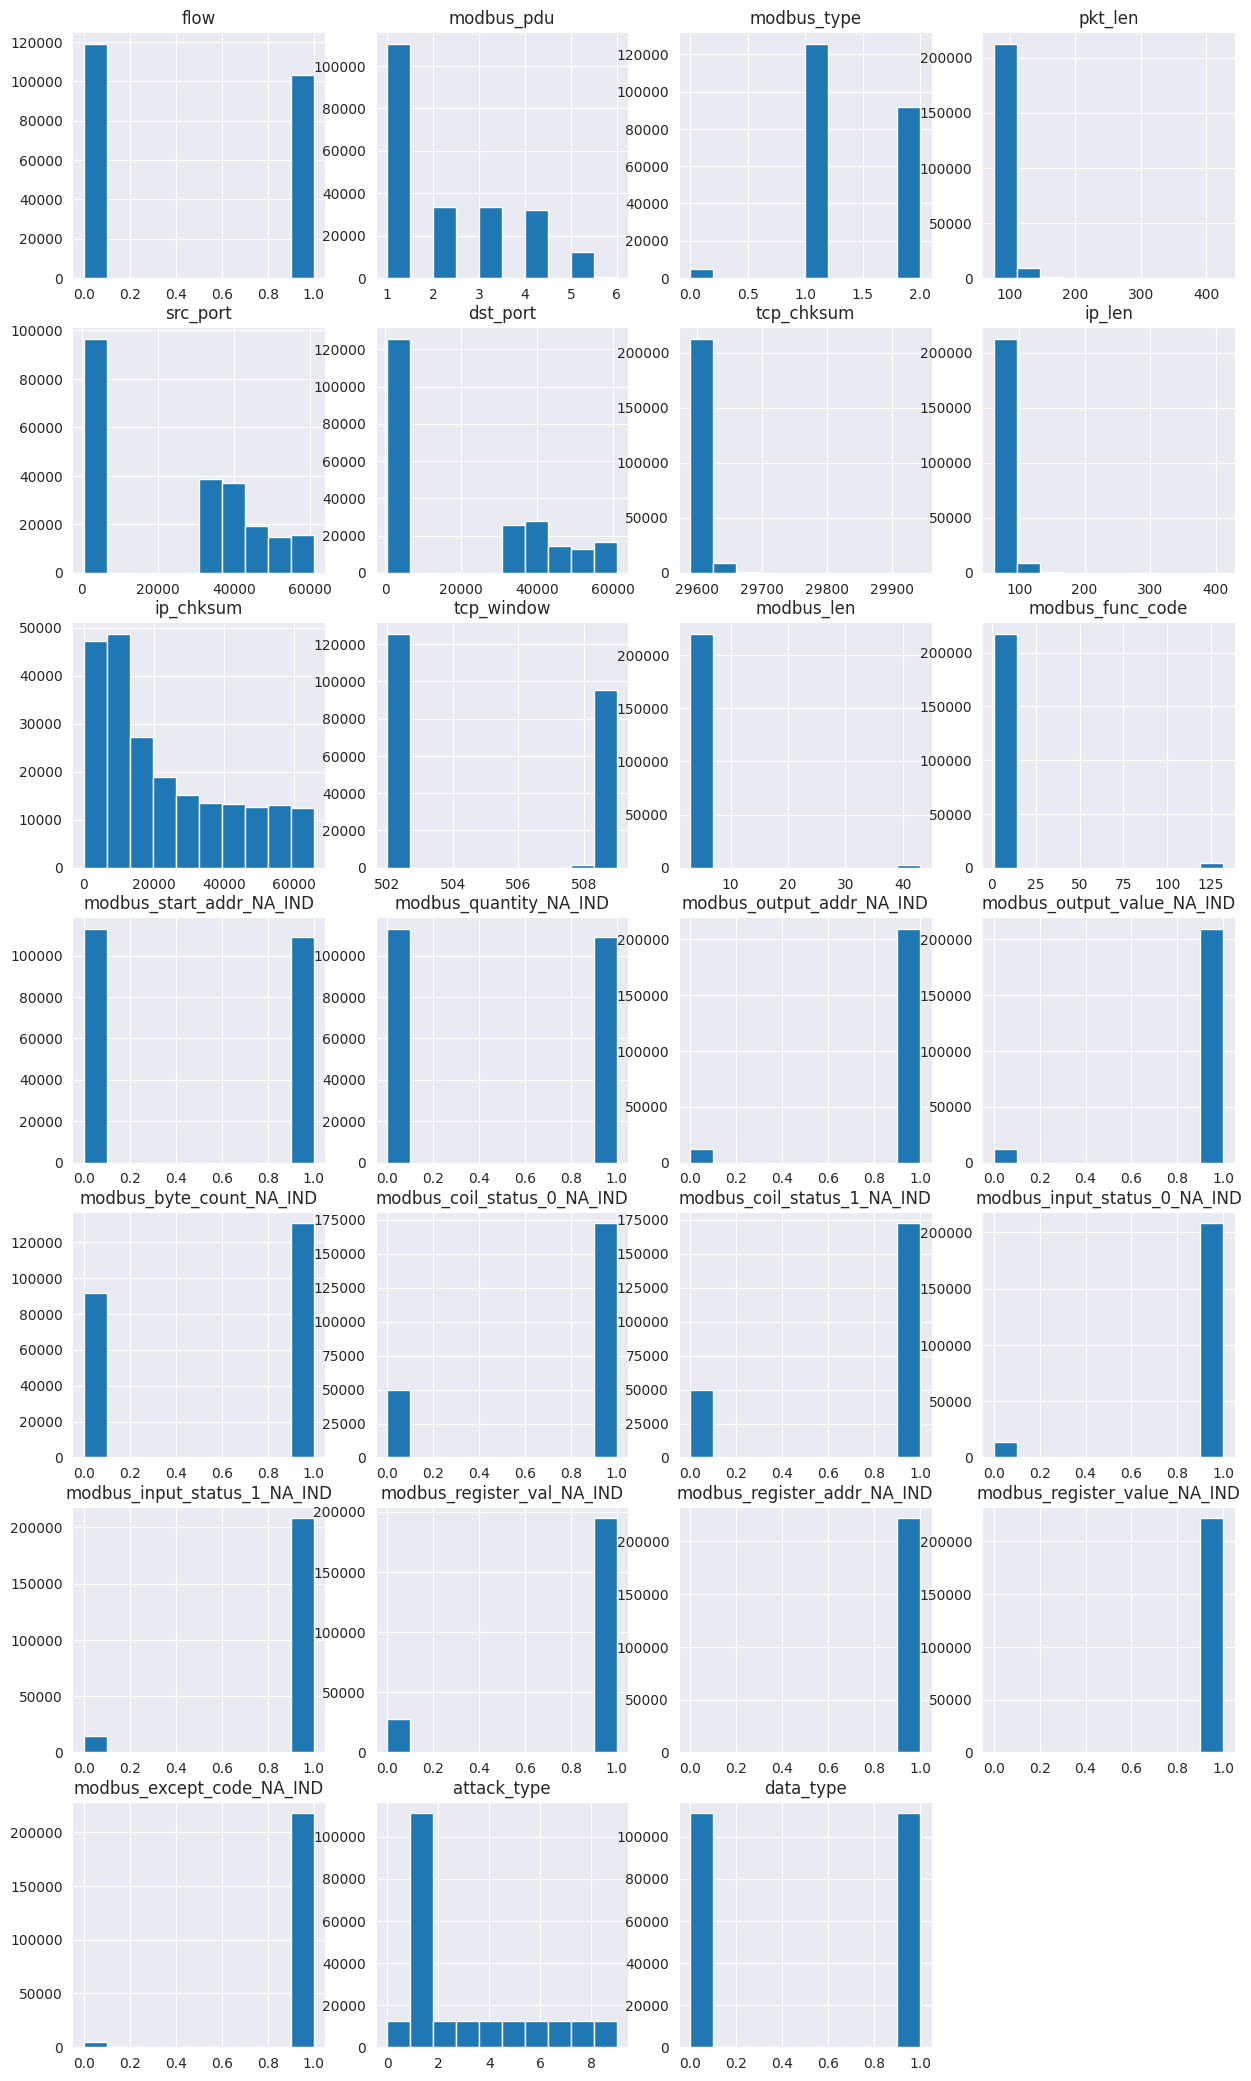

In [6]:
plt.figure(figsize=(15,30))
pos = 1
for i in df.columns:
    plt.subplot(8, 4, pos)
    plt.title(f'{i}')
    plt.hist(df[i])
    pos += 1

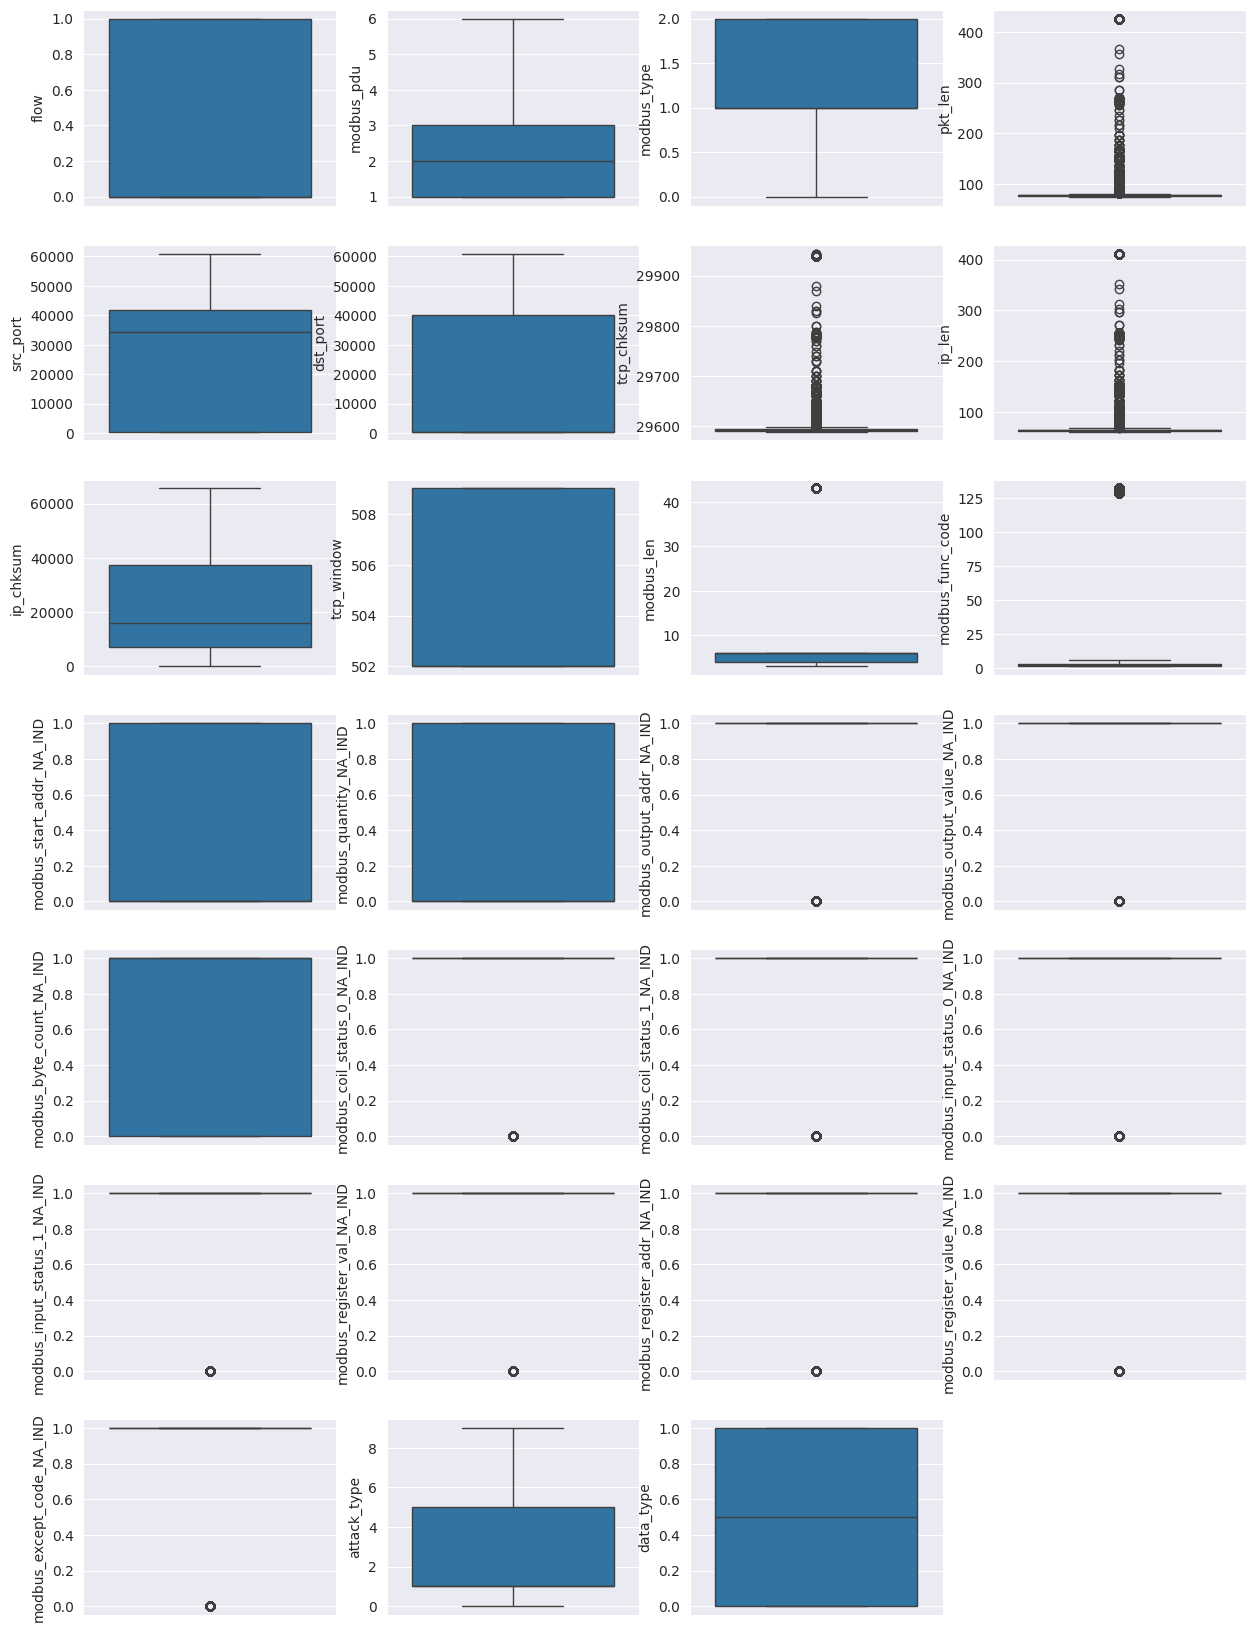

In [7]:
plt.figure(figsize=(15,30))
pos = 1
for i in df.columns:
    plt.subplot(10, 4, pos) # Sistemare (nrows,ncols) in base a come esce il grafico
    sns.boxplot(df[i])
    pos += 1

In [8]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

flow                                0
modbus_pdu                          0
modbus_type                         0
pkt_len                         17014
src_port                            0
dst_port                            0
tcp_chksum                      11014
ip_len                          17014
ip_chksum                           0
tcp_window                          0
modbus_len                       2204
modbus_func_code                 4593
modbus_start_addr_NA_IND            0
modbus_quantity_NA_IND              0
modbus_output_addr_NA_IND       12454
modbus_output_value_NA_IND      12454
modbus_byte_count_NA_IND            0
modbus_coil_status_0_NA_IND     49949
modbus_coil_status_1_NA_IND     49949
modbus_input_status_0_NA_IND    14164
modbus_input_status_1_NA_IND    14164
modbus_register_val_NA_IND      27626
modbus_register_addr_NA_IND       319
modbus_register_value_NA_IND      319
modbus_except_code_NA_IND        4593
attack_type                         0
data_type   

Gli outlier su pkt_len, tcp_chksum e ip_len sono relativi a degli attacchi ben precisi, quindi questi valori estremi sono utili per la rilevazione dell'attacco, tra essi sono presenti anche i 2 outlier di modbus_len, che quindi sono anch'essi utili.
Gli outlier su modbus_func_code si riferiscono a pacchetti di errore, generati in seguito ad attacchi, che quindi possono essere utili.
Il resto degli outlier sono tutti dovuti allo sbilanciamento tra classe benigna e maligna

In [9]:
correlation_matrix = df.corr()
plt.figure(figsize=(50, 50))
sns.set(font_scale=1.5)
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)
plt.savefig('processed/correlation_mat/corr_modbusDataset.png')
plt.close()